In [2]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import yfinance as yf
import pandas as pd
import datetime as dt 

# Download raw data

In [4]:
yfin_data = yf.download( 
        tickers = 'BTC-USD ^GSPC ^DJI ^IXIC CL=F GC=F EURUSD=X ^TNX USDT-USD ETH-USD',
        start="2017-09-01", 
        end="2022-09-01")[['Close']]

[*********************100%***********************]  10 of 10 completed


In [5]:
yfin_data.columns

MultiIndex([('Close',  'BTC-USD'),
            ('Close',     'CL=F'),
            ('Close',  'ETH-USD'),
            ('Close', 'EURUSD=X'),
            ('Close',     'GC=F'),
            ('Close', 'USDT-USD'),
            ('Close',     '^DJI'),
            ('Close',    '^GSPC'),
            ('Close',    '^IXIC'),
            ('Close',     '^TNX')],
           )

In [6]:
yfin_data.columns = ['btc', 'oil', 'ethereum', 'euro', 'gold', 'tether', 'dow', 'sp', 'nasdaq', 'tenyear']

In [7]:
yfin_data.shape

(1826, 10)

In [8]:
yfin_data.head()

,btc,oil,ethereum,euro,gold,tether,dow,sp,nasdaq,tenyear
Date,,,,,,,,,,
2017-09-01,4892.009766,47.290001,NaN,1.191043,1324.500000,NaN,21987.560547,2476.550049,6435.330078,2.157
2017-09-02,4578.770020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-03,4582.959961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-04,4236.310059,NaN,NaN,1.188284,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-05,4376.529785,48.660000,NaN,1.189343,1339.199951,NaN,21753.310547,2457.850098,6375.569824,2.070


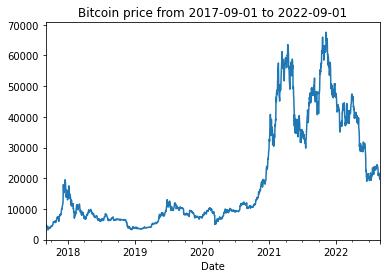

In [9]:
yfin_data.btc.plot(title='Bitcoin price from 2017-09-01 to 2022-09-01');

# Process data

In [10]:
yfin_data_processed = yfin_data.copy()

In [11]:
for data in yfin_data_processed.columns:
    # Set new column names 
    data_tmr = data + '_tmr'
    data_change = data + '_change'
    yfin_data_processed[data_tmr] = yfin_data_processed[data].shift(-1) # Create columns for price of the next day. 
    yfin_data_processed[data_change] = (yfin_data_processed[data_tmr] > yfin_data_processed[data]).astype(int) # Create columns for price change, 1 for up, 0 for down or nochange. 

In [12]:
yfin_data_processed.head(10)

,btc,oil,ethereum,euro,gold,tether,dow,sp,nasdaq,tenyear,...,tether_tmr,tether_change,dow_tmr,dow_change,sp_tmr,sp_change,nasdaq_tmr,nasdaq_change,tenyear_tmr,tenyear_change
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,4892.009766,47.290001,NaN,1.191043,1324.500000,NaN,21987.560547,2476.550049,6435.330078,2.157,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2017-09-02,4578.770020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2017-09-03,4582.959961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2017-09-04,4236.310059,NaN,NaN,1.188284,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,21753.310547,0,2457.850098,0,6375.569824,0,2.070,0
2017-09-05,4376.529785,48.660000,NaN,1.189343,1339.199951,NaN,21753.310547,2457.850098,6375.569824,2.070,...,NaN,0,21807.640625,1,2465.540039,1,6393.310059,1,2.108,1
2017-09-06,4597.120117,49.160000,NaN,1.192407,1333.900024,NaN,21807.640625,2465.540039,6393.310059,2.108,...,NaN,0,21784.779297,0,2465.100098,0,6397.870117,1,2.061,0
2017-09-07,4599.879883,49.090000,NaN,1.192777,1345.099976,NaN,21784.779297,2465.100098,6397.870117,2.061,...,NaN,0,21797.789062,1,2461.429932,0,6360.189941,0,2.061,0
2017-09-08,4228.750000,47.480000,NaN,1.202906,1346.000000,NaN,21797.789062,2461.429932,6360.189941,2.061,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2017-09-09,4226.060059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [13]:
yfin_data_processed.btc_change.value_counts()

1    955
0    871
Name: btc_change, dtype: int64

In [14]:
yfin_data_processed.describe()

,btc,oil,ethereum,euro,gold,tether,dow,sp,nasdaq,tenyear,...,tether_tmr,tether_change,dow_tmr,dow_change,sp_tmr,sp_change,nasdaq_tmr,nasdaq_change,tenyear_tmr,tenyear_change
count,1826.000000,1260.000000,1757.000000,1302.000000,1258.000000,1757.000000,1258.000000,1258.000000,1258.000000,1258.000000,...,1757.000000,1826.000000,1257.000000,1826.000000,1257.000000,1826.000000,1257.000000,1826.00000,1257.000000,1826.000000
mean,19648.554517,62.836254,1114.897192,1.147182,1578.303496,1.001692,28476.990157,3365.287369,10149.061679,1.968954,...,1.001692,0.472618,28482.152790,0.296824,3365.994399,0.301752,10152.016119,0.30230,1.968804,0.260679
std,17290.028456,19.553090,1226.402895,0.050696,256.642805,0.005885,4171.792418,692.277121,2940.775552,0.797127,...,0.005885,0.499386,4169.430735,0.456983,692.098125,0.459144,2940.077696,0.45938,0.797426,0.439125
min,3154.949951,-37.630001,84.308296,0.993868,1176.199951,0.966644,18591.929688,2237.399902,6192.919922,0.499000,...,0.966644,0.000000,18591.929688,0.000000,2237.399902,0.000000,6192.919922,0.00000,0.499000,0.000000
25%,7245.359375,52.360001,205.141998,1.115051,1309.249969,0.999980,25205.744629,2784.249939,7588.997314,1.419750,...,0.999980,0.000000,25219.380859,0.000000,2784.489990,0.000000,7591.029785,0.00000,1.419000,0.000000
50%,10183.570801,60.980001,450.697998,1.144623,1603.750000,1.000571,26980.350586,3097.184937,8944.685059,1.900000,...,1.000571,0.000000,26989.990234,0.000000,3097.739990,0.000000,8945.650391,0.00000,1.897000,0.000000
75%,33740.259766,70.459999,1834.150513,1.183919,1809.149963,1.002750,32650.239746,4006.270020,13035.242188,2.754500,...,1.002750,1.000000,32654.589844,1.000000,4008.010010,1.000000,13036.429688,1.00000,2.755000,1.000000
max,67566.828125,123.699997,4812.087402,1.251001,2051.500000,1.077880,36799.648438,4796.560059,16057.440430,3.483000,...,1.077880,1.000000,36799.648438,1.000000,4796.560059,1.000000,16057.440430,1.00000,3.483000,1.000000


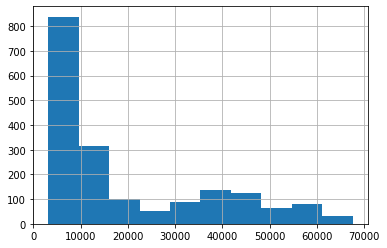

In [15]:
yfin_data_processed.btc.hist();

In [16]:
yfin_data_processed.to_csv('btc_yfinance.csv')